In [2]:
#https://github.com/yaelhezki/MiniProject1 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [4]:
df = pd.read_csv("laptop_price - dataset.csv")

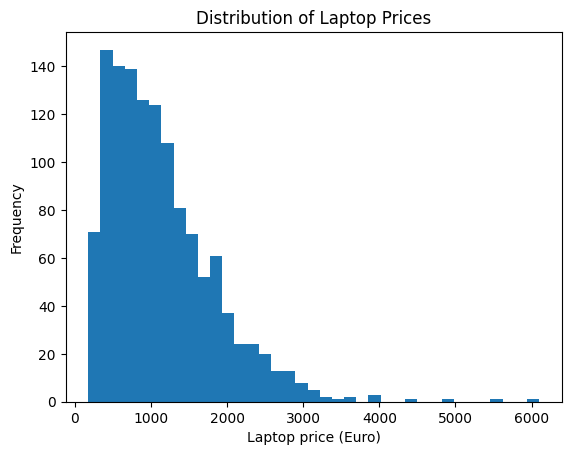

In [25]:
#1. Plot the price of all the laptops
#an histogram of distribution of laptop prices
laptop_prices = df['Price (Euro)']

plt.hist(laptop_prices, bins='auto')

plt.title('Distribution of Laptop Prices')
plt.xlabel('Laptop price (Euro)')
plt.ylabel('Frequency')
plt.show()


the company that has on avarage the most expensive laptop is Razer with an avarage price of 3346.1428571428573


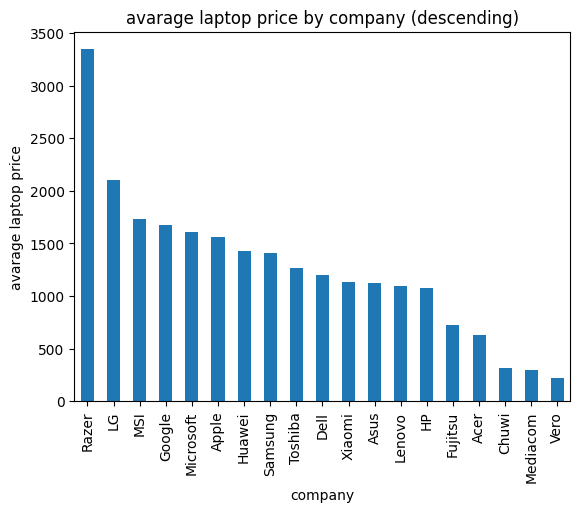

the average laptop price for each company (descending):
 Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [40]:
#2. Which company has on average the most expensive laptop? What is the average laptop price for each company?
#an histogram of the avarage laptop price for each company
company = df['Company']
prices_by_company = df.groupby('Company')['Price (Euro)']
avg_price_by_company = prices_by_company.mean().sort_values(ascending=False)
avg_price_by_company.plot(kind='bar')

max_avg_price = max(avg_price_by_company)
max_avg_price_company = avg_price_by_company.idxmax()
print ("\nthe company that has on avarage the most expensive laptop is", max_avg_price_company, "with an avarage price of", max_avg_price)

plt.title('avarage laptop price by company (descending)')
plt.xlabel('company')
plt.ylabel('avarage laptop price')
plt.show()

print ("the average laptop price for each company (descending):\n", avg_price_by_company.sort_values(ascending=False))



In [66]:
#3. Find the different types of Operating systems present in the data - under the column name "OpSys".
print (df['OpSys'].unique())

#the problematic OS names is Mac and Windows
#create a function that handels Mac and Windows
def clean_OpSys(os):
    if 'windows' in os.lower():
        return 'Windows'
    elif 'mac' in os.lower():
        return 'Mac'
    else:
        return os

#creating a new column of OpSys with uniform name for each category
df['OpSys_clean'] = df['OpSys'].apply(clean_OpSys)

#prinrig the different types of Operating systems
os_types = df['OpSys_clean'].unique()
print(os_types)


['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
['Mac' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


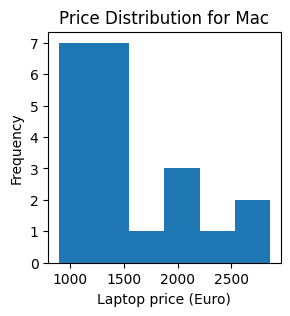

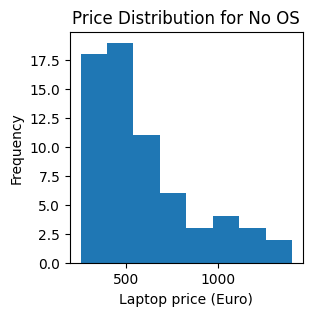

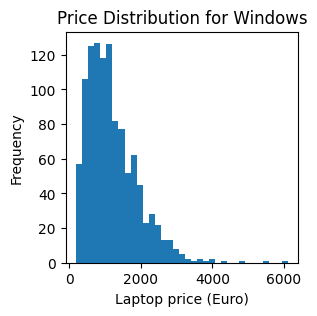

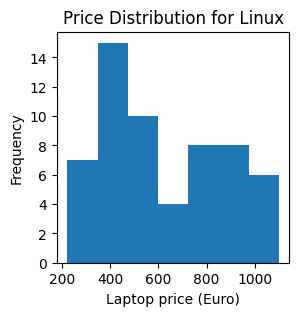

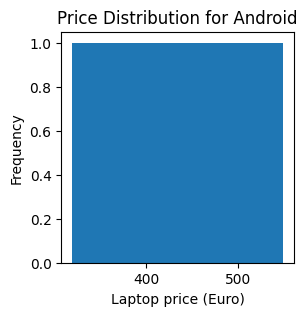

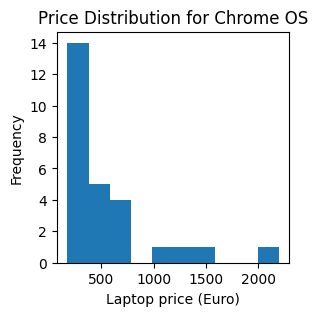

In [72]:
#4. Plot for each of the operating system types the distribution of the prices

for os_type in os_types:
    
    #Select laptop prices for the current operating system
    prices = df.loc[df['OpSys_clean'] == os_type, 'Price (Euro)']
    
    #Create a small seperate histogram for each operating system
    plt.figure(figsize=(3,3))
    plt.hist(prices, bins='auto')
    
    plt.title(f'Price Distribution for {os_type}')
    plt.xlabel('Laptop price (Euro)')
    plt.ylabel('Frequency')
    
    plt.show()


Rows after removing outliers: 1249 out of 1275
the Correlation between RAM and laptop price: 0.7148298764163609


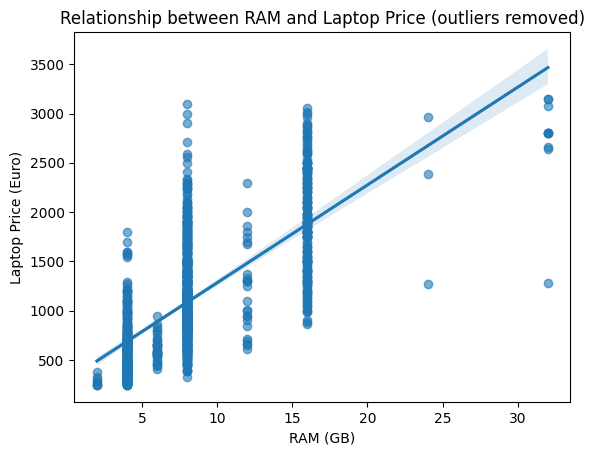

In [106]:
#5. the relationship between RAM and computer price

# check outliers for RAM (keep values inside 1%-99%)
RAM_lower_percentile = df['RAM (GB)'].quantile(0.01)
RAM_upper_percentile = df['RAM (GB)'].quantile(0.99)
ram_mask = (df['RAM (GB)'] >= RAM_lower_percentile) & (df['RAM (GB)'] <= RAM_upper_percentile)

# check outliers for price (keep values inside 1%-99%)
price_lower_percentile = df['Price (Euro)'].quantile(0.01)
price_upper_percentile = df['Price (Euro)'].quantile(0.99)
price_mask = (df['Price (Euro)'] >= price_lower_percentile) & (df['Price (Euro)'] <= price_upper_percentile)

# build a single dataframe without outliers
df_no_outliers = df[ram_mask & price_mask]

# check for self
print("Rows after removing outliers:", len(df_no_outliers), "out of", len(df))

# correlation between RAM and price (without outliers)
RAM_price_corr = df_no_outliers['RAM (GB)'].corr(df_no_outliers['Price (Euro)'])
print("the Correlation between RAM and laptop price:", RAM_price_corr)

# plot without outliers
sns.regplot(x='RAM (GB)', y='Price (Euro)', data=df_no_outliers, scatter_kws={'alpha': 0.6})
plt.title('Relationship between RAM and Laptop Price (outliers removed)')
plt.xlabel('RAM (GB)')
plt.ylabel('Laptop Price (Euro)')
plt.show()

In [107]:
#6. Create a new column "Storage type" extracted from the "Memory" column

print(df['Memory'].unique())

# Extract storage type using string pattern matching
df['Storage type'] = df['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash)', expand=False)

# Check the result
print(df[['Memory', 'Storage type']].head())


['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage        Flash
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD
['SSD' 'Flash' 'HDD' 'Hybrid']
